# Task 4: Apply multiple colours to top (shirt) colour, generate new shirt images

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
shirt_color_mapper = {
    "White": (255, 255, 255),
    "Light Blue": (173, 216, 230),
    "Navy Blue": (0, 0, 128),
    "Black": (0, 0, 0),
    "Gray": (128, 128, 128),
    "Charcoal": (54, 69, 79),
    "Burgundy": (128, 0, 32),
    "Olive Green": (107, 142, 35),
    "Khaki or Beige": (195, 176, 145),
    "Pastel Pink": (255, 182, 193),
    "Teal": (0, 128, 128),
    # Plaid and Stripes are patterns, not single colors
}

In [14]:
# Load the original image 
original_img_path = 'data/images/MEN-Denim-id_00000080-01_7_additional.jpg'  # Replace with your image path
original_img = Image.open(original_img_path)
original_img = np.array(original_img)

# Load the segmentation map
segm_path = '/home/solarspaceclouds/Desktop/DeepFashion/data/segm/MEN-Denim-id_00000080-01_7_additional_segm.png'  # Replace with your segmentation map path
segm = Image.open(segm_path)
segm = np.array(segm)

In [15]:
img = cv2.imread(original_img_path)
segmentation_mask = cv2.imread(segm_path, 0)  # Assuming grayscale image where each pixel value is the segment label


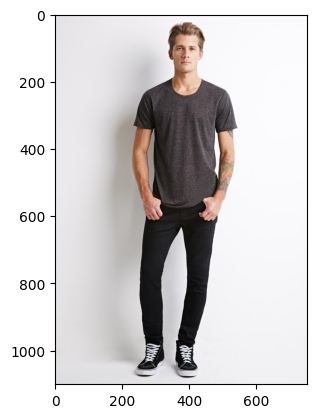

In [16]:
plt.imshow(original_img)

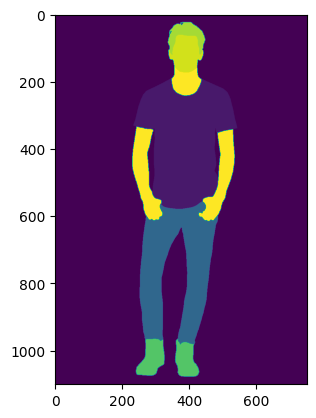

In [18]:
plt.imshow(segm)

In [19]:
# Define the target segment label and target color (in BGR)
target_segment_label = 1
target_color = np.array([0, 0, 255])  # Example: converting to RED in BGR format


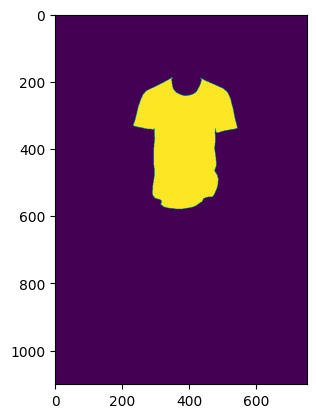

In [20]:
# Create a mask for the target segment
target_segment_mask = segm == target_segment_label
display_mask = (target_segment_mask.astype('uint8')) * 255
plt.imshow(display_mask)

In [21]:
# Create an image filled with the target color, same size as original
colored_img = np.full_like(img, target_color)

# Apply the mask to the original and colored images
masked_original = cv2.bitwise_and(img, img, mask=display_mask)
masked_colored = cv2.bitwise_and(colored_img, colored_img, mask=display_mask)

# alpha for blending (between 0 and 1)
alpha = 0.3

# Blend the masked original image and the masked colored image
blended_segment = cv2.addWeighted(masked_original, 1 - alpha, masked_colored, alpha, 0)

# Create inverse mask for the rest of the image
inverse_mask = cv2.bitwise_not(display_mask)

# Combine the blended segment with the rest of the image
rest_of_image = cv2.bitwise_and(img, img, mask=inverse_mask)
blended_img = cv2.add(rest_of_image, blended_segment)

# Save the result
cv2.imwrite("blended_output.jpg", blended_img)


True

# Create the function

In [27]:
def change_shirt_colors(original_img_path, segm_path, target_segment_label, target_colors, alpha,saturation_increase=50):
    # Shirt color mapper    
    # BGR
    shirt_color_mapper = {
    "Light Blue": (230, 216, 173),
    "Navy Blue": (128, 0, 0),
    "Black": (0, 0, 0),
    "Gray": (128, 128, 128),
    "Charcoal": (79, 69, 54),
    "Burgundy": (32, 0, 128),
    "Olive Green": (35, 142, 107),
    "Khaki or Beige": (145, 176, 195),
    "Pastel Pink": (193, 182, 255),
    "Teal": (128, 128, 0)
    }

    # Load the original image and segmentation mask
    img = cv2.imread(original_img_path)
    segm = Image.open(segm_path)
    segm = np.array(segm)       
    # segmentation_mask = cv2.imread(segm_path, 0)

    # Process for each target color
    for color_name in target_colors:
        if color_name in shirt_color_mapper:
            # Convert target color to HSV
            target_color_bgr = np.uint8([[shirt_color_mapper[color_name]]])
            target_color_hsv = cv2.cvtColor(target_color_bgr, cv2.COLOR_BGR2HSV)
            
            # Increase the saturation
            target_color_hsv[0][0][1] = min(target_color_hsv[0][0][1] + saturation_increase, 255)

            # Convert back to BGR
            target_color = cv2.cvtColor(target_color_hsv, cv2.COLOR_HSV2BGR)[0][0]


            # target_color = np.array(shirt_color_mapper[color_name])

            # Create a mask for the target segment
            target_segment_mask = segm == target_segment_label
            display_mask = (target_segment_mask.astype('uint8')) * 255
            # Create an image filled with the target color, same size as original
            colored_img = np.full_like(img, target_color)

            # Apply the mask to the original and colored images
            masked_original = cv2.bitwise_and(img, img, mask=display_mask)
            masked_colored = cv2.bitwise_and(colored_img, colored_img, mask=display_mask)

            # Blend the masked original image and the masked colored image
            blended_segment = cv2.addWeighted(masked_original, 1 - alpha, masked_colored, alpha, 0)

            # Create an inverse mask for the rest of the image
            inverse_mask = cv2.bitwise_not(display_mask)

            # Combine the blended segment with the rest of the image
            blended_img = cv2.add(cv2.bitwise_and(img, img, mask=inverse_mask), blended_segment)

            # print(original_img_path)
            result_img_path = original_img_path.replace("data","task4")[:-4] + f"_blended_output_{color_name}.jpg"

            print(result_img_path)
            
            # Extract the directory path from the full image path
            directory = os.path.dirname(result_img_path)

            # Check if the directory exists, and if not, create it
            if not os.path.exists(directory):
                os.makedirs(directory)
                print(f"Created directory: {directory}")
            else:
                print(f"Directory already exists: {directory}")
                
   
            # result_img_path = f"blended_output_{color_name}.jpg"
            cv2.imwrite(result_img_path, blended_img)
     
        else:
            print(f"Color '{color_name}' not found in color mapper.")




In [28]:
# Example usage
# Load the original image 
original_img_path = 'data/images/MEN-Denim-id_00000080-01_7_additional.jpg'  # Replace with your image path
# Load the segmentation map
segm_path = 'data/segm/MEN-Denim-id_00000080-01_7_additional_segm.png'  # Replace with your segmentation map path

target_segment_label = 1
# target_colors = ["Navy Blue", "Burgundy", "Olive Green"]  # List of colors to be applied
target_colors = shirt_color_mapper.keys()
alpha = 0.28

change_shirt_colors(original_img_path, segm_path, target_segment_label, target_colors, alpha,100)

Color 'White' not found in color mapper.
task4/images/MEN-Denim-id_00000080-01_7_additional_blended_output_Light Blue.jpg
Created directory: task4/images
task4/images/MEN-Denim-id_00000080-01_7_additional_blended_output_Navy Blue.jpg
Directory already exists: task4/images
task4/images/MEN-Denim-id_00000080-01_7_additional_blended_output_Black.jpg
Directory already exists: task4/images
task4/images/MEN-Denim-id_00000080-01_7_additional_blended_output_Gray.jpg
Directory already exists: task4/images
task4/images/MEN-Denim-id_00000080-01_7_additional_blended_output_Charcoal.jpg
Directory already exists: task4/images
task4/images/MEN-Denim-id_00000080-01_7_additional_blended_output_Burgundy.jpg
Directory already exists: task4/images
task4/images/MEN-Denim-id_00000080-01_7_additional_blended_output_Olive Green.jpg
Directory already exists: task4/images
task4/images/MEN-Denim-id_00000080-01_7_additional_blended_output_Khaki or Beige.jpg
Directory already exists: task4/images
task4/images/MEN-

# Misc

In [ ]:
    # RGB
    # shirt_color_mapper = {
    #     "Light Blue": (173, 216, 230),
    #     "Navy Blue": (0, 0, 128),
    #     "Black": (0, 0, 0),
    #     "Gray": (128, 128, 128),
    #     "Charcoal": (54, 69, 79),
    #     "Burgundy": (128, 0, 32),
    #     "Olive Green": (107, 142, 35),
    #     "Khaki or Beige": (195, 176, 145),
    #     "Pastel Pink": (255, 182, 193),
    #     "Teal": (0, 128, 128)
    # }